In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot    as plt
import matplotlib.animation as animation

from IPython.display import HTML
from solver.fdtd   import FDTD, Source
from solver.panel  import RTfunction, Panel

# Grid Properties
N     = 200
dx    = 0.002
xMax  = N*dx
tEnd  = 5e-8

# Panel Properties
sigma        = 0.04
permittivity = 4
panel_min    = 110
panel_max    = 140
thickness    = (panel_max - panel_min)*dx

# Pulse Properties

In [3]:
print("initiating...\n")

###############################################################################
# FDTD
###############################################################################

grid  = np.linspace(0, dx*N, N)

# Simulacion con panel grande
fdtd0 = FDTD(grid_prop  = (dx, N, tEnd), 
             panel_prop = (panel_min, N, sigma, permittivity),
             pulse  = Source('gauss', 40, 12, 20))

# Simulación principal
fdtd1 = FDTD(grid_prop  = (dx, N, tEnd), 
             panel_prop = (panel_min, panel_max, sigma, permittivity),
             pulse  = Source('gauss', 40, 12, 20))

# Simulación vacío
fdtd2 = FDTD(grid_prop  = (dx, N, tEnd), 
             panel_prop = (panel_min, panel_max, 0, 1),
             pulse  = Source('gauss', 40, 12, 20))

# Simulación secundaria
fdtd3 = FDTD(grid_prop  = (dx, N, tEnd), 
             panel_prop = (panel_min, 120, sigma, permittivity),
             pulse  = Source('gauss', 40, 12, 20))

probedE0, probedH0 = fdtd0.simulation() 
print("Simu0: check")
probedE1, probedH1 = fdtd1.simulation()
print("Simu1: check")
probedE2, probedH2 = fdtd2.simulation() 
print("Simu2: check")
probedE3, probedH3 = fdtd3.simulation() 
print("Simu3: check\n")

R1, T1, W1 = RTfunction(probedE1, probedE2, panel_min, panel_max, tEnd)
R3, T3, W3 = RTfunction(probedE3, probedE2, panel_min, 120, tEnd)

###############################################################################
# Panel
###############################################################################    

w1 = np.linspace(1, 3e12, 100001) * 2 *np.pi
r1 = np.abs(Panel(thickness,  permittivity,   sigma).R(w1))
t1 = np.abs(Panel(thickness,  permittivity,   sigma).T(w1))

initiating...

fdtd0: check
fdtd1: check
fdtd2: check
fdtd3: check

Simu0: check
Simu1: check
Simu2: check
Simu3: check

RTW1  : check
RTW1  : check
rtw   : check


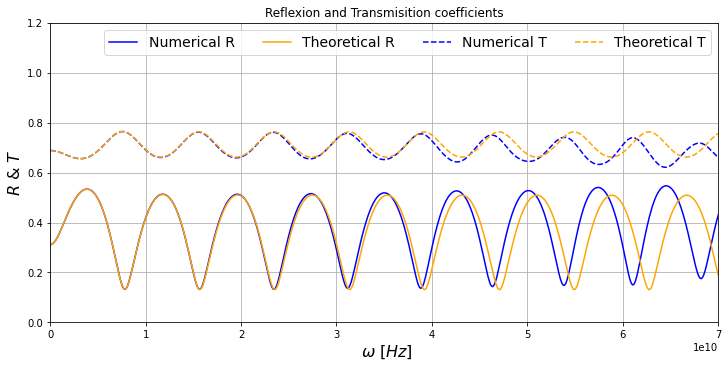

In [15]:
###############################################################################
# Visualization Principal
###############################################################################
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(10,5))

axs.set_title('Reflexion and Transmisition coefficients')
axs.set_ylabel(r"$R$ & $T$", fontsize = 16)
axs.set_xlabel(r" $\omega$ $[Hz]$", fontsize = 16)


axs.set_xlim(1, 7e10)
axs.set_ylim(0, 1.2)

axs.plot(W1, R1, label='Numerical R', color = "blue")
axs.plot(w1, r1, label='Theoretical R', color = "orange")

axs.plot(W1, T1, 'b--', label='Numerical T')
axs.plot(w1, t1, '--', color = "orange", label='Theoretical T')

axs.grid()
axs.legend(loc='best', ncol=4, fontsize=14)

plt.show()

In [16]:
fig.savefig("Anima_&_Graphic/image1.png")

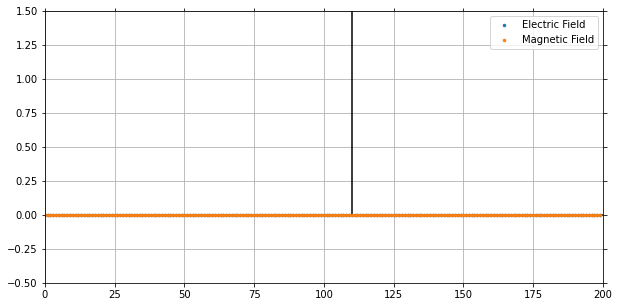

In [8]:
# Simulación con el material NO delgado
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set(xlim=(0, N), ylim=(-1.2, 1.2))

#funcion escenario
def init():
    pass

def panel(ax):
    ax.hlines(0, 0, panel_min, 'k')
    ax.hlines(0, 0, 250, 'k')
    ax.vlines(panel_min, 0, 1.5, 'k')

#funcion animacion
def actualizar(i):
    ax1.clear()
    ax1.plot(np.arange(0, N), probedE0[i,:], ".", markersize=5, label="Electric Field")
    ax1.plot(np.arange(0, N), probedH0[i,:], ".", markersize=5, label="Magnetic Field")
    panel(ax1)
    ax1.grid()
    ax1.set_ylim(-0.5,1.5)
    ax1.set_xlim(0,200)
    ax1.legend()

ani1 = animation.FuncAnimation(fig, actualizar,
                              frames = range(1000), interval= 30,
                              repeat = True)

HTML(ani1.to_html5_video())

In [9]:
ani1.save("Anima_&_Graphic/sim0.mp4")

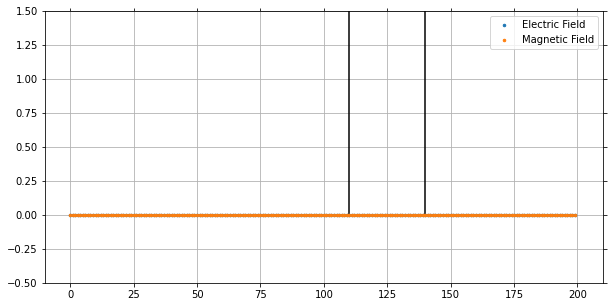

In [10]:
# Simulacion Principal
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.set(xlim=(0, N), ylim=(-1.2, 1.2))

#funcion escenario
def init():
    pass

def panel(ax):
    ax.hlines(0, 0, panel_min, 'k')
    ax.hlines(0, panel_max, N, 'k')
    ax.vlines(panel_min, 0, 1.5, 'k')
    ax.vlines(panel_max, 0, 1.5, 'k')

#funcion animacion
def actualizar(i):
    ax2.clear()
    ax2.plot(np.arange(0, N), probedE1[i,:], ".", markersize=5, label="Electric Field")
    ax2.plot(np.arange(0, N), probedH1[i,:], ".", markersize=5, label="Magnetic Field")
    panel(ax2)
    ax2.grid()
    ax2.set_ylim(-0.5,1.5)
    ax2.legend()

ani2 = animation.FuncAnimation(fig, actualizar,
                              frames = range(1000), interval= 30,
                              repeat = True)

HTML(ani2.to_html5_video())

In [11]:
ani2.save("Anima_&_Graphic/sim1.mp4")

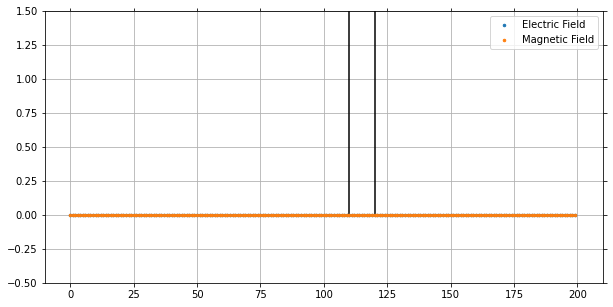

In [12]:
# Simulacion Principal
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.set(xlim=(0, N), ylim=(-1.2, 1.2))

#funcion escenario
def init():
    pass

def panel(ax):
    ax.hlines(0, 0, panel_min, 'k')
    ax.hlines(0, 120, N, 'k')
    ax.vlines(panel_min, 0, 1.5, 'k')
    ax.vlines(120, 0, 1.5, 'k')

#funcion animacion
def actualizar(i):
    ax2.clear()
    ax2.plot(np.arange(0, N), probedE3[i,:], ".", markersize=5, label="Electric Field")
    ax2.plot(np.arange(0, N), probedH3[i,:], ".", markersize=5, label="Magnetic Field")
    panel(ax2)
    ax2.grid()
    ax2.set_ylim(-0.5,1.5)
    ax2.legend()

ani2 = animation.FuncAnimation(fig, actualizar,
                              frames = range(1000), interval= 30,
                              repeat = True)

HTML(ani2.to_html5_video())

In [13]:
ani2.save("Anima_&_Graphic/sim3.mp4")